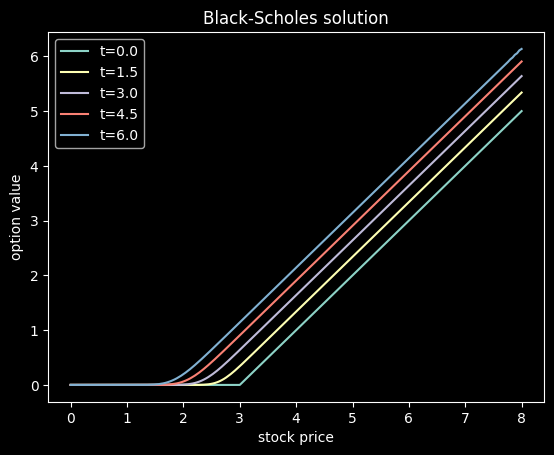

In [22]:
from numpy import *
from matplotlib.pyplot import *

Smax, T = 8, 6
K = 3
sigma = 0.06
r = 0.08

m = 200
h = Smax / m
x = h * arange(m+1)
n = 827
tau = T / n
t = tau * arange(n+1)
lamb, mu = tau / h**2, tau / h

V = zeros([m + 1, n + 1])
V[:, 0] = maximum(0, x - K)
for j in range(n):
    # Fictitious value from Neumann condition.
    Vfict = 2 * h + V[m-1, j]
    Vj = hstack([V[:, j], Vfict])
    # First row is zero by the Dirichlet condition.
    for i in range(1, m+1):
        diff1 = Vj[i+1] - Vj[i-1]
        diff2 = Vj[i+1] - 2 * Vj[i] + Vj[i-1]
        V[i, j+1] = (
            Vj[i]
            + (lamb * sigma**2 * x[i] ** 2 / 2) * diff2
            + (r * x[i] * mu) / 2 * diff1
            - r * tau * Vj[i]
        )

select_times = 207 * arange(5)
show_times = t[select_times]

for j, col in enumerate(select_times):
    plot(x, V[:, col], label=f"t={show_times[j]:.1f}")

legend()
xlabel("stock price"),  ylabel("option value")
title("Black-Scholes solution");

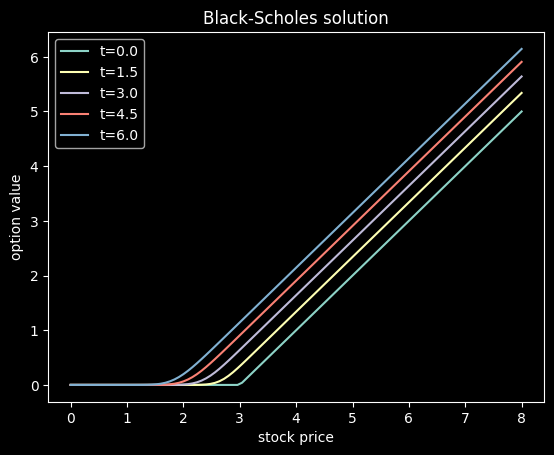

In [6]:
from numpy import *
from matplotlib.pyplot import *

Smax, T = 8, 6
K = 3
sigma = 0.06
r = 0.08

m = 100
h = Smax / m
x = h * arange(m+1)
n = 1000
tau = T / n
t = tau * arange(n+1)
lamb, mu = tau / h**2, tau / h

V = zeros([m + 1, n + 1])
V[:, 0] = maximum(0, x - K)
for j in range(n):
    # Fictitious value from Neumann condition.
    Vfict = 2 * h + V[m-1, j]
    Vj = hstack([V[:, j], Vfict])
    # First row is zero by the Dirichlet condition.
    for i in range(1, m+1):
        diff1 = Vj[i+1] - Vj[i-1]
        diff2 = Vj[i+1] - 2 * Vj[i] + Vj[i-1]
        V[i, j+1] = (
            Vj[i]
            + (lamb * sigma**2 * x[i] ** 2 / 2) * diff2
            + (r * x[i] * mu) / 2 * diff1
            - r * tau * Vj[i]
        )

select_times = 250 * arange(5)
show_times = t[select_times]

for j, col in enumerate(select_times):
    plot(x, V[:, col], label=f"t={show_times[j]:.1f}")

legend()
xlabel("stock price"),  ylabel("option value")
title("Black-Scholes solution");